In [1]:
# package imports
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC, SMOTEN
import matplotlib.pyplot as plt 

In [2]:
# load data
aarp = pd.read_csv('Data/clean_AARP.csv')

In [3]:
# list vars
model_vars = ['AGE4_recode', 'D6_recode', 'D8_recode', 'D9C_recode', 'D18_recode', 'D26_recode', 'MARITAL_recode', 'EDUC4_recode', 'RACETHNICITY_recode', 'GENDER_recode', 'HHSIZE', 'INCOME_recode']

# aarp be aarp
aarp = aarp[model_vars]

aarp['RACETHNICITY_recode'] = pd.Categorical(aarp['RACETHNICITY_recode'])
aarp['GENDER_recode'] = pd.Categorical(aarp['GENDER_recode'])
aarp['MARITAL_recode'] = pd.Categorical(aarp['MARITAL_recode'])
aarp['D26_recode'] = pd.Categorical(aarp['D26_recode'])
aarp['D18_recode'] = pd.Categorical(aarp['D18_recode'])

# recode D9C to binary
# if you never feel SI then 1, else 2, 
# then 0, 1 binary
aarp['is_si'] = aarp['D9C_recode'].apply(lambda x: 1 if x == 1 else 1 if x == 2 else 3)
aarp['is_si'] = aarp['is_si'].apply(lambda x: 0 if x == 1 else 1)

In [4]:
# make decision tree object
clf = DecisionTreeClassifier(random_state=42)

In [5]:
# make our x and y
x = aarp[model_vars].drop(['D9C_recode', 'AGE4_recode'], axis=1)
y = aarp['is_si']

In [6]:
# train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
# decision tree regular fit
clf.fit(x_train,y_train)
clf.score(x_test, y_test)

0.583596214511041

In [8]:
# baseline
aarp['is_si'].value_counts()[0]/aarp['is_si'].value_counts().sum()
# 68% baseline..

0.6793336803748048

In [9]:
# 79%... what quantities?
aarp['is_si'].value_counts()

0    1305
1     616
Name: is_si, dtype: int64

In [10]:
# prepare grid search
param_grid = { 
    'max_leaf_nodes': range(2,1000,22),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,100, 6),
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]
}

In [11]:
# do the grid search
CV_DT = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 4, n_jobs=-1) 
CV_DT.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 100, 6),
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': range(2, 1000, 22)})

In [12]:
# score it
CV_DT.score(x_test, y_test)

0.6750788643533123

In [ ]:
# 67... even grid search can't get it much better?

In [14]:
# what are the feature importances?
for importance, feature in zip(clf.feature_importances_, clf.feature_names_in_):
    print(f'{round(importance,3)}\t{feature}')

0.09	D6_recode
0.122	D8_recode
0.124	D18_recode
0.038	D26_recode
0.069	MARITAL_recode
0.095	EDUC4_recode
0.078	RACETHNICITY_recode
0.049	GENDER_recode
0.105	HHSIZE
0.231	INCOME_recode


In [15]:
# DT for each age category... regular decision tree
for ages in aarp['AGE4_recode'].unique():
    age_aarp = aarp.loc[aarp['AGE4_recode'] == ages]
    x = age_aarp.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
    y = age_aarp['is_si']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    DecisionTreeClassifier(random_state=42)
    clf.fit(x_train,y_train)
    print(f'---------- score for age {ages} {round(clf.score(x_test, y_test),3)}% -----------')
    
    for importance, feature in zip(clf.feature_importances_, clf.feature_names_in_):
        print(f'{round(importance,3)}\t{feature}')

---------- score for age 4 0.68% -----------
0.114	D6_recode
0.096	D8_recode
0.135	D18_recode
0.058	D26_recode
0.173	MARITAL_recode
0.063	EDUC4_recode
0.094	RACETHNICITY_recode
0.05	GENDER_recode
0.059	HHSIZE
0.157	INCOME_recode
---------- score for age 2 0.511% -----------
0.125	D6_recode
0.155	D8_recode
0.099	D18_recode
0.033	D26_recode
0.112	MARITAL_recode
0.072	EDUC4_recode
0.098	RACETHNICITY_recode
0.052	GENDER_recode
0.085	HHSIZE
0.17	INCOME_recode
---------- score for age 3 0.578% -----------
0.107	D6_recode
0.164	D8_recode
0.112	D18_recode
0.055	D26_recode
0.112	MARITAL_recode
0.055	EDUC4_recode
0.048	RACETHNICITY_recode
0.026	GENDER_recode
0.156	HHSIZE
0.165	INCOME_recode
---------- score for age 1 0.484% -----------
0.084	D6_recode
0.105	D8_recode
0.093	D18_recode
0.02	D26_recode
0.064	MARITAL_recode
0.14	EDUC4_recode
0.119	RACETHNICITY_recode
0.038	GENDER_recode
0.137	HHSIZE
0.199	INCOME_recode


In [16]:
# DT for each age category... regular decision tree

# prepare grid search
# 
param_grid = { 
    'max_leaf_nodes': range(2,1000,22),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,100, 6),
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]
}

for ages in aarp['AGE4_recode'].unique():
    age_aarp = aarp.loc[aarp['AGE4_recode'] == ages]
    x = age_aarp.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
    y = age_aarp['is_si']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    DecisionTreeClassifier(random_state=42)
    # do the grid search
    CV_DT = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 4, n_jobs=-1) 
    CV_DT.fit(x_train, y_train)
    print(f'---------- score for age {ages} {round(CV_DT.best_estimator_.score(x_test, y_test),3)}% -----------')
    
    for importance, feature in zip(CV_DT.best_estimator_.feature_importances_, CV_DT.feature_names_in_):
        print(f'{round(importance,3)}\t{feature}')

---------- score for age 4 0.81% -----------
0.0	D6_recode
0.0	D8_recode
0.0	D18_recode
0.0	D26_recode
1.0	MARITAL_recode
0.0	EDUC4_recode
0.0	RACETHNICITY_recode
0.0	GENDER_recode
0.0	HHSIZE
0.0	INCOME_recode
---------- score for age 2 0.629% -----------
0.247	D6_recode
0.202	D8_recode
0.077	D18_recode
0.048	D26_recode
0.123	MARITAL_recode
0.028	EDUC4_recode
0.133	RACETHNICITY_recode
0.037	GENDER_recode
0.022	HHSIZE
0.084	INCOME_recode
---------- score for age 3 0.673% -----------
0.1	D6_recode
0.117	D8_recode
0.094	D18_recode
0.098	D26_recode
0.105	MARITAL_recode
0.0	EDUC4_recode
0.068	RACETHNICITY_recode
0.049	GENDER_recode
0.223	HHSIZE
0.147	INCOME_recode
---------- score for age 1 0.572% -----------
0.213	D6_recode
0.047	D8_recode
0.025	D18_recode
0.047	D26_recode
0.152	MARITAL_recode
0.086	EDUC4_recode
0.035	RACETHNICITY_recode
0.048	GENDER_recode
0.108	HHSIZE
0.239	INCOME_recode


### same as above but upsampling training data

In [17]:
# make train and test set
aarp_train, aarp_test = train_test_split(aarp, test_size=0.33, random_state=42)

In [18]:
aarp_train['is_si'].value_counts()

0    883
1    404
Name: is_si, dtype: int64

In [19]:
# upsample train set
to_resample = aarp_train.loc[aarp['is_si'] ==1]
our_resample = to_resample.sample(n = 479, replace = True, random_state=42)
aarp_train_rebal = pd.concat([aarp_train, our_resample])

In [20]:
# manually create x,y test and trains
x_train = aarp_train_rebal.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
x_test = aarp_test.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
y_train = aarp_train_rebal['is_si']
y_test = aarp_test['is_si']

In [21]:
aarp_train_rebal['is_si'].value_counts()

0    883
1    883
Name: is_si, dtype: int64

In [22]:
# grid search it
CV_DT = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 4, n_jobs=-1) 
CV_DT.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 100, 6),
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': range(2, 1000, 22)})

In [23]:
CV_DT.score(x_test, y_test)

0.6025236593059937

In [24]:
# DT for each age category
# Also have ridiculous grid search parameters to make it quick since we end up using SMOTE below

for ages in aarp['AGE4_recode'].unique():
    
    # grab aarp for single age group
    aged_aarp = aarp.loc[aarp['AGE4_recode'] == ages]
    
    # split into train and test
    aarp_train, aarp_test = train_test_split(aged_aarp, test_size=0.33, random_state=42)
    
    # upsample train set
    # make sure that the 0 count is larger
    if aarp_train['is_si'].value_counts()[0] - aarp_train['is_si'].value_counts()[1] > 0:
        amt_to_rebal = aarp_train['is_si'].value_counts()[0] - aarp_train['is_si'].value_counts()[1]
        
        to_resample = aarp_train.loc[aarp['is_si'] ==1]
        our_resample = to_resample.sample(n = amt_to_rebal, replace = True, random_state=42)
        aarp_train_rebal = pd.concat([aarp_train, our_resample])
    else:
        # make sure the number is positive and we recode 1 instead
        amt_to_rebal = (aarp_train['is_si'].value_counts()[0] - aarp_train['is_si'].value_counts()[1]) * -1
        to_resample = aarp_train.loc[aarp_train['is_si'] ==0]
        our_resample = to_resample.sample(n = amt_to_rebal, replace = True, random_state=42)
        aarp_train_rebal = pd.concat([aarp_train, our_resample])
        
    
    # manually create x,y test and trains
    x_train = aarp_train_rebal.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
    x_test = aarp_test.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
    y_train = aarp_train_rebal['is_si']
    y_test = aarp_test['is_si']
    
    # new decision tree
    clf = DecisionTreeClassifier(random_state=42)
    
    # grid to search
    param_grid = { 
    'max_leaf_nodes': range(2,1000,55),
    'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth' : range(1,100, 9),
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]
}
    # new grid search using decision tree and grid from above
    CV_DT = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 4, n_jobs=-1) 
    
    # let's 'train'
    CV_DT.fit(x_train, y_train)
    
    # print the results
    print(f'\n---------- score for age {ages}: {round(CV_DT.score(x_test, y_test),3)}% ----------')
    
    for importance, feature in zip(CV_DT.best_estimator_.feature_importances_, CV_DT.feature_names_in_):
        print(f'{round(importance,3)}\t{feature}')
        
    ###### print train and test set sizes
    print(f'\ntraining set size: \n{y_train.value_counts()}')
    print(f'testing set size:  \n{y_test.value_counts()}')
    ###### 


---------- score for age 4: 0.68% ----------
0.18	D6_recode
0.099	D8_recode
0.188	D18_recode
0.025	D26_recode
0.074	MARITAL_recode
0.063	EDUC4_recode
0.117	RACETHNICITY_recode
0.027	GENDER_recode
0.028	HHSIZE
0.199	INCOME_recode

training set size: 
1    253
0    253
Name: is_si, dtype: int64
testing set size:  
0    124
1     29
Name: is_si, dtype: int64

---------- score for age 2: 0.551% ----------
0.124	D6_recode
0.143	D8_recode
0.045	D18_recode
0.029	D26_recode
0.11	MARITAL_recode
0.135	EDUC4_recode
0.046	RACETHNICITY_recode
0.039	GENDER_recode
0.135	HHSIZE
0.193	INCOME_recode

training set size: 
0    241
1    241
Name: is_si, dtype: int64
testing set size:  
0    117
1     61
Name: is_si, dtype: int64

---------- score for age 3: 0.673% ----------
0.154	D6_recode
0.15	D8_recode
0.092	D18_recode
0.037	D26_recode
0.07	MARITAL_recode
0.095	EDUC4_recode
0.061	RACETHNICITY_recode
0.027	GENDER_recode
0.164	HHSIZE
0.152	INCOME_recode

training set size: 
1    221
0    221
Name: is_si,

### trying imbalanced-learn

In [25]:
# testing random, SMOTE and ADASYN(these cannot handle continous and categorical, use SMOTENC), 
# SMOTENC is for numerical and categorical features, but not good for categorical ONLY datasets. 
# use the parameter categorical_features to specify which are categorical
# SMOTENC for numerical AND categorical
# SMOTEN for categorical ONLY

In [26]:
# first we need the indexes of the categorical columns
cat_idxs =[]
for idx, dtype in zip(range(len(aarp.dtypes)), aarp.dtypes):
    if dtype == 'category':
        cat_idxs.append(idx)

In [27]:
cat_idxs

[4, 5, 6, 8, 9]

In [28]:
# now let's see how balanced this is originally
aarp_train, aarp_test = train_test_split(aarp, test_size=0.33, random_state=42)

# break these up into x and y's
x_train = aarp_train.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
x_test = aarp_test.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
y_train = aarp_train['is_si']
y_test = aarp_test['is_si']

y_train.value_counts()

0    883
1    404
Name: is_si, dtype: int64

In [29]:
sm = SMOTENC(random_state=42, categorical_features=cat_idxs)

In [30]:
x_bal, y_bal = sm.fit_resample(x_train, y_train)

In [31]:
y_bal.value_counts()

0    883
1    883
Name: is_si, dtype: int64

## SMOTENC
### okaaaayy that was easy? Let's put it into our age loop.  
#### It will clean up some code seeing that we don't need our pandas sample code and if-statement anymore

In [32]:
#Creating dataframes to hold feature importances
fi_df1 = pd.DataFrame()
fi_df2 = pd.DataFrame()
fi_df3 = pd.DataFrame()
fi_df4 = pd.DataFrame()
summary_plot = pd.DataFrame()

In [33]:
# DT for each age category
for ages in aarp['AGE4_recode'].unique():
    
    # grab aarp for single age group
    aged_aarp = aarp.loc[aarp['AGE4_recode'] == ages]
    
    # split into train and test
    aarp_train, aarp_test = train_test_split(aged_aarp, test_size=0.33, random_state=42)

    # upsample train set
    # first we need the indexes of the categorical columns
    # cat_idxs =[]
    # for idx, dtype in zip(range(len(aged_aarp.dtypes)), aged_aarp.dtypes):
    #     if dtype == 'category':
    #         cat_idxs.append(idx)
            
    # then create our imbalance object
    # sm = SMOTENC(random_state=42, categorical_features=cat_idxs)
    sm = SMOTEN(random_state=42)
    
    # manually create x,y test and trains
    x_train = aarp_train.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
    x_test = aarp_test.drop(['D9C_recode', 'AGE4_recode', 'is_si'], axis=1)
    y_train = aarp_train['is_si']
    y_test = aarp_test['is_si']
    
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    # new decision tree
    clf = DecisionTreeClassifier(random_state=42)
    
    # grid to search
    param_grid = { 
    'max_leaf_nodes': range(2,1000,11),
    'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth' : range(1,100, 3),
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]
}
    # new grid search using decision tree and grid from above
    CV_DT = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5, n_jobs=-1) 
    
    # let's 'train'
    CV_DT.fit(x_train, y_train)
    
    # print the results
    print(f'\n---------- score for age {ages}: {round(CV_DT.score(x_test, y_test),3)}% ----------')
    
    for importance, feature in zip(CV_DT.best_estimator_.feature_importances_, CV_DT.feature_names_in_):
        print(f'{round(importance,3)}\t{feature}')
        
        #Saving summary data to a dataframe for plots
        if ages ==1:
            fi_new = {'importance': (round(importance,3)), 'feature': feature}
            fi_df1 = pd.concat([fi_df1, pd.DataFrame(fi_new, index=[feature])])#, ignore_index=True)

        if ages==2:
            fi_new = {'importance': (round(importance,3)), 'feature': feature}
            fi_df2 = pd.concat([fi_df2, pd.DataFrame(fi_new, index=[feature])])#, ignore_index=True)
            
        if ages==3:
            fi_new = {'importance': (round(importance,3)), 'feature': feature}
            fi_df3 = pd.concat([fi_df3, pd.DataFrame(fi_new, index=[feature])])#, ignore_index=True)

        if ages==4:
            fi_new = {'importance': (round(importance,3)), 'feature': feature}
            fi_df4 = pd.concat([fi_df4, pd.DataFrame(fi_new, index=[feature])])#, ignore_index=True)
        
    ###### print train and test set sizes
    print(f'\ntraining set size: \n{y_train.value_counts()}')
    print(f'testing set size:  \n{y_test.value_counts()}')
    ###### 


---------- score for age 4: 0.693% ----------
0.15	D6_recode
0.114	D8_recode
0.107	D18_recode
0.092	D26_recode
0.059	MARITAL_recode
0.091	EDUC4_recode
0.109	RACETHNICITY_recode
0.016	GENDER_recode
0.037	HHSIZE
0.225	INCOME_recode

training set size: 
1    253
0    253
Name: is_si, dtype: int64
testing set size:  
0    124
1     29
Name: is_si, dtype: int64

---------- score for age 2: 0.607% ----------
0.116	D6_recode
0.125	D8_recode
0.09	D18_recode
0.034	D26_recode
0.101	MARITAL_recode
0.096	EDUC4_recode
0.082	RACETHNICITY_recode
0.028	GENDER_recode
0.115	HHSIZE
0.213	INCOME_recode

training set size: 
0    241
1    241
Name: is_si, dtype: int64
testing set size:  
0    117
1     61
Name: is_si, dtype: int64

---------- score for age 3: 0.605% ----------
0.115	D6_recode
0.163	D8_recode
0.062	D18_recode
0.053	D26_recode
0.032	MARITAL_recode
0.044	EDUC4_recode
0.119	RACETHNICITY_recode
0.022	GENDER_recode
0.193	HHSIZE
0.196	INCOME_recode

training set size: 
1    221
0    221
Name: is_

In [34]:
#Add a new column in each summary dataframe that indicates the Age group of the dataframe
fi_df1['Age Group'] = '18-29'
fi_df2['Age Group'] = '30-44'
fi_df3['Age Group'] = '45-59'
fi_df4['Age Group'] = '60+'

#Create a new data frame to hold data that will be used for plotting
summary_plot = pd.concat([fi_df1,fi_df2,fi_df3,fi_df4])

In [35]:
summary_plot.replace(to_replace={'D6_recode': 'Overall Health',
                         'D8_recode':'Frequency of contact, non-household', 
                         'D18_recode':'Employment Status',
                         'D26_recode':'Community Type',
                         'MARITAL_recode':'Marital Status',
                         'RACETHNICITY_recode':'Race/Ethnicity',
                         'GENDER_recode':'Gender',
                         'HHSIZE':'Household Size',
                         'EDUC4_recode': 'Education',
                         'INCOME_recode': 'Income'},inplace=True)

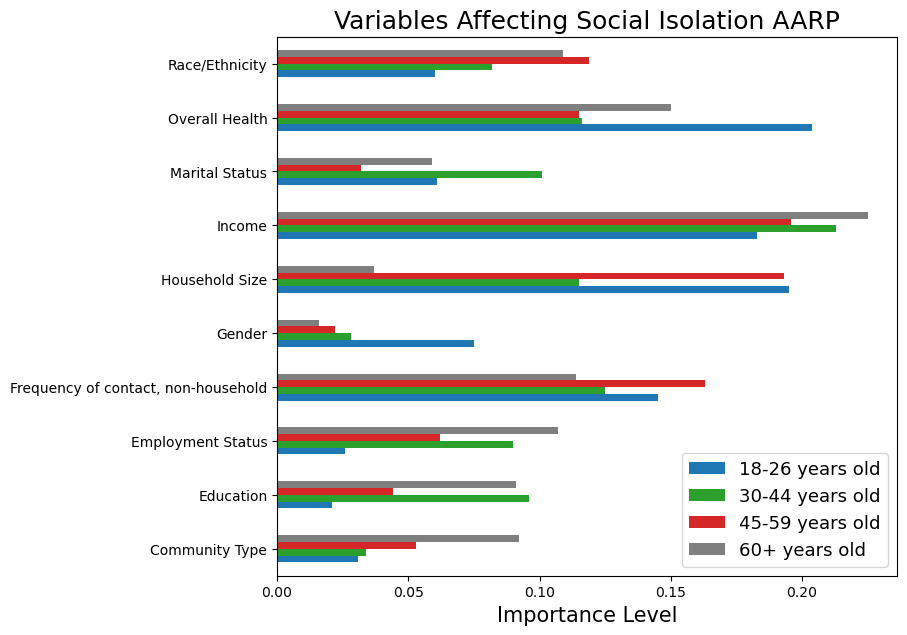

In [41]:
#plt.figure(figsize=(10,10))
from matplotlib.colors import ListedColormap

colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:gray']
cmap = ListedColormap(colors)

ax = summary_plot.pivot(columns='Age Group', index='feature').plot.barh(figsize=(8,7),rot=0,cmap=cmap)#['tab:blue','tab:green','tab:red','tab:gray'])#


plt.title('Variables Affecting Social Isolation AARP', fontsize=18)
plt.xlabel('Importance Level',fontsize=15)
plt.ylabel('',fontsize=15)
plt.legend(labels=['18-26 years old','30-44 years old','45-59 years old','60+ years old'],fontsize=13)
#ax.tick_params(axis='x',labelsize=12)
#ax.tick_params(axis='y', labelsize=10)
# ax.set_yticklabels(['# of Weekday Interactions', 'Mental Health', 'Physical Health','Job Overtime','Married','Participation in Groups','Job Satisfaction','Work From Home'])
# plt.setp(ax.yaxis.get_majorticklabels(), ha="right" )

In [ ]:
summary_plot.pivot(index='feature',columns='Age Group')